In [2]:
# Importing useful libraries - YT: Multiple Regression Analysis in Python | Part 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import math
import datetime

from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [55]:
# Importing the database
df = pd.read_excel(r'C:\Users\danie\Documents\IMBA\SEMESTER 1\4. Research Methods & Data Analysis\3. Final report\Excel\FACTORS_x_DS.xlsx', sheet_name = 'Kraken' )
dg = pd.read_excel(r'C:\Users\danie\Documents\IMBA\SEMESTER 1\4. Research Methods & Data Analysis\3. Final report\Excel\FACTORS_x_DS.xlsx', sheet_name = 'Upbit' )
df = df.dropna(how = "any")
dg = dg.dropna(how = "any")

In [30]:
dg

,Date,r_f,Mp(EW),EMA_Mp(EW),Mp(VW),EMA_Mp(VW),Size_1(EW),Size_1(VW),Size_2(EW),Size_2(VW),...,Kim_3(EW),Kim_3(VW),Market factor (EW),Market factor (VW),BMS (EW),BMS (VW),KIM (EW),KIM (VW),WML (EW),WML (VW)
28,2021-07-17,1.31,0.700641,0.009944,-0.015433,0.003133,0.243254,-0.018505,1.478865,-1.065594,...,2.074583,0.716781,-0.609359,-1.325433,-0.253658,-0.748985,-1.275511,-0.696497,-1.824837,1.053182
29,2021-07-18,1.19,0.241945,0.008431,1.284827,0.002372,0.800335,1.279472,-0.627853,-0.320179,...,-0.459880,0.089282,-0.948055,0.094827,0.381966,-0.126535,-0.441212,1.140158,0.940874,1.615486
30,2021-07-19,1.19,-3.916618,0.014282,-2.266753,0.005328,-3.313254,-2.272268,-4.156891,-4.604304,...,-3.677399,-3.309870,-5.106618,-3.456753,1.042547,-3.184735,0.258771,0.997826,0.667737,2.340341
31,2021-07-20,1.23,-4.940214,0.023439,-4.225323,0.012459,-4.306588,-4.233492,-4.797462,-5.726710,...,-3.526113,-2.331117,-6.170214,-5.455323,1.455246,1.470113,0.874166,-1.807609,1.061781,1.473326
32,2021-07-21,1.30,8.622737,0.005218,7.212693,0.002530,9.457613,7.216538,8.788570,8.720738,...,9.625308,10.857467,7.322737,5.912693,1.914748,-0.422064,-1.203550,-3.471813,-1.373314,-1.509603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2021-12-29,1.55,-3.370108,0.012528,-1.925441,0.045605,-3.727848,-1.920259,-2.358467,-0.230091,...,-3.915008,-4.261781,-4.920108,-3.475441,0.089556,0.002040,2.642332,2.201834,-0.300167,-1.688966
194,2021-12-30,1.52,0.883466,0.009603,0.136766,0.043379,0.832677,0.138472,1.108490,0.778032,...,1.206022,1.115758,-0.636534,-1.383234,0.093420,-0.183054,-0.481030,-0.923371,-0.317311,-0.650800
195,2021-12-31,1.52,-0.789369,0.009796,-0.773785,0.044152,-0.921651,-0.772935,-0.013674,-0.337253,...,0.073881,-0.022223,-2.309369,-2.293785,0.434499,-0.215588,1.386566,-0.708952,0.674772,-0.467821
196,2022-01-01,1.52,2.293333,0.005389,1.994650,0.036501,2.363476,1.995669,1.659353,2.324331,...,1.433196,1.585645,0.773333,0.474650,-0.450330,0.708416,-0.781315,0.385364,-0.696560,-0.301921


In [56]:
# Set the index equal to the Date column
df.index = df['Date']
dg.index = dg['Date']

df = df.drop('Date', axis = 1)
dg = dg.drop('Date', axis = 1)

In [57]:
# Set the data type of the data frame
df = df.astype(float)
dg = dg.astype(float)

# df = df.loc["2017-08-02": "2017-08-06"]  #This allows to restrict the number of rows to a selected interval

## df_pre refers to the dataframe until Covid-19.
## df_post refers to the datafram after covid-19.

# df_pre = df.loc['2017-08-01': '2020-02-19']
# df_post = df.loc['2020-02-20': '2021-03-31']

# Rename the columns
# column_names = {"rf": "Rf", "BMS": "BMS", "WML": "WML", "ILLIQ": "ILLIQ"}
# df = df.rename(columns = column_names)

# Check for nulls
display ("-"*100)
display(df.head())
display(dg.head())

'----------------------------------------------------------------------------------------------------'

,r_f,Mp(EW),EMA_Mp(EW),Mp(VW),EMA_Mp(VW),Size_1(EW),Size_1(VW),Size_2(EW),Size_2(VW),Size_3(EW),...,Kim_3(EW),Kim_3(VW),Market factor (EW),Market factor (VW),BMS (EW),BMS (VW),KIM (EW),KIM (VW),WML (EW),WML (VW)
Date,,,,,,,,,,,,,,,,,,,,,
2021-07-17,1.31,1.018650,0.011099,0.289278,0.003974,0.514871,0.286056,1.650565,-0.666255,0.995906,...,2.301262,1.239135,-0.291350,-1.020722,-0.481035,-0.263725,-1.077262,-0.904417,-1.378972,0.908658
2021-07-18,1.19,-0.143008,0.010088,0.917873,0.003430,0.415164,0.913196,-0.750471,-0.504824,-0.200401,...,-0.684807,-0.355205,-1.333008,-0.272127,0.615565,-0.244497,-0.292454,1.214002,0.601179,-0.048946
2021-07-19,1.19,-4.741732,0.018000,-3.012703,0.007802,-4.063420,-3.018787,-5.061434,-5.322062,-5.191066,...,-4.574639,-4.029395,-5.931732,-4.202703,1.127646,-2.567147,0.338122,0.971994,1.231540,2.198236
2021-07-20,1.23,-4.412536,0.026330,-3.476429,0.014212,-3.689158,-3.486196,-4.243247,-5.335824,-5.357000,...,-2.922532,-1.792287,-5.642536,-4.706429,1.667842,1.815373,1.110056,-1.607682,1.132972,2.682456
2021-07-21,1.30,8.999403,0.006150,7.367822,0.003192,9.583473,7.373712,9.168579,9.211968,8.196336,...,9.923636,11.123068,7.699403,6.067822,1.387137,-1.187199,-1.305665,-3.576432,-1.308990,-2.512103


,r_f,Mp(EW),EMA_Mp(EW),Mp(VW),EMA_Mp(VW),Size_1(EW),Size_1(VW),Size_2(EW),Size_2(VW),Size_3(EW),...,Kim_3(EW),Kim_3(VW),Market factor (EW),Market factor (VW),BMS (EW),BMS (VW),KIM (EW),KIM (VW),WML (EW),WML (VW)
Date,,,,,,,,,,,,,,,,,,,,,
2021-07-17,1.31,0.700641,0.009944,-0.015433,0.003133,0.243254,-0.018505,1.478865,-1.065594,0.496911,...,2.074583,0.716781,-0.609359,-1.325433,-0.253658,-0.748985,-1.275511,-0.696497,-1.824837,1.053182
2021-07-18,1.19,0.241945,0.008431,1.284827,0.002372,0.800335,1.279472,-0.627853,-0.320179,0.418370,...,-0.459880,0.089282,-0.948055,0.094827,0.381966,-0.126535,-0.441212,1.140158,0.940874,1.615486
2021-07-19,1.19,-3.916618,0.014282,-2.266753,0.005328,-3.313254,-2.272268,-4.156891,-4.604304,-4.355801,...,-3.677399,-3.309870,-5.106618,-3.456753,1.042547,-3.184735,0.258771,0.997826,0.667737,2.340341
2021-07-20,1.23,-4.940214,0.023439,-4.225323,0.012459,-4.306588,-4.233492,-4.797462,-5.726710,-5.761835,...,-3.526113,-2.331117,-6.170214,-5.455323,1.455246,1.470113,0.874166,-1.807609,1.061781,1.473326
2021-07-21,1.30,8.622737,0.005218,7.212693,0.002530,9.457613,7.216538,8.788570,8.720738,7.542865,...,9.625308,10.857467,7.322737,5.912693,1.914748,-0.422064,-1.203550,-3.471813,-1.373314,-1.509603


,Market factor (EW),BMS (EW),WML (EW),KIM (EW)
Market factor (EW),1.0000,-0.4146,-0.2526,-0.2848
BMS (EW),-0.4146,1.0000,0.2224,0.5478
WML (EW),-0.2526,0.2224,1.0000,0.5096
KIM (EW),-0.2848,0.5478,0.5096,1.0000


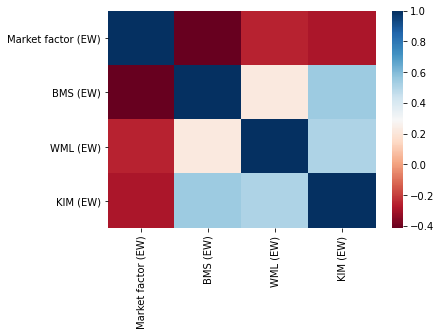

In [58]:
# PART 2
# Assumptions of multiple regression analysis:
#    - Regression residuals must be normally distributed.
#    - A linear relationship is assumed between the dependent variable and the independent variables.
#    - The residuals are homoscedastic and approximately rectangular-shaped.
#    - Absence of multicollinearity is expected in the model, meaning that the independent variables are not too highly correlated.
#    - No autocorrelation of the residuals.

# CORRELATION (EW) - Kraken

# column_names = {"Market factor (EW)": "Market factor", "BMS (EW)": "BMS", "WML (EW)": "WML", "KIM (EW)": "KIM"}
# df = df.rename(columns = column_names)

# Check for multicollinearity (Correlation matrix)
corr_EW = df[['Market factor (EW)', 'BMS (EW)', 'WML (EW)', 'KIM (EW)']].corr(method = 'spearman')



# Display the correlation matrix
display(corr_EW.round(4))
corr_EW.to_excel(r'C:\Users\danie\Documents\IMBA\SEMESTER 1\4. Research Methods & Data Analysis\3. Final report\Excel\From_Py\Corr_EW_Kraken.xlsx')

# Plot a heat map
sns.heatmap(corr_EW, xticklabels = corr_EW.columns, yticklabels = corr_EW.columns, cmap = "RdBu")
plt.savefig(r'C:\Users\danie\Documents\IMBA\SEMESTER 1\4. Research Methods & Data Analysis\3. Final report\Excel\From_Py\Corr_EW_Kraken.png', bbox_inches='tight')

,Market factor (VW),BMS (VW),WML (VW),KIM (VW)
Market factor (VW),1.000000,0.114573,0.129314,-0.001574
BMS (VW),0.114573,1.000000,0.522414,0.636436
WML (VW),0.129314,0.522414,1.000000,0.435409
KIM (VW),-0.001574,0.636436,0.435409,1.000000


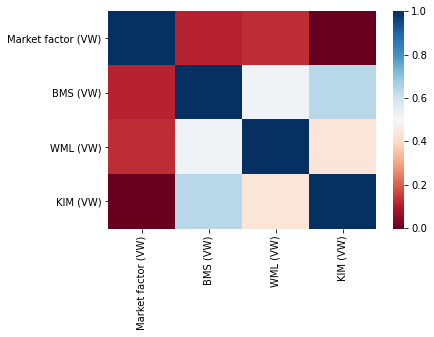

In [34]:
# CORRELATION (VW) - Kraken
corr_VW = df[['Market factor (VW)', 'BMS (VW)', 'WML (VW)', 'KIM (VW)']].corr(method = 'spearman')
display(corr_VW)
corr_VW.to_excel(r'C:\Users\danie\Documents\IMBA\SEMESTER 1\4. Research Methods & Data Analysis\3. Final report\Excel\From_Py\Corr_VW_Kraken.xlsx')
sns.heatmap(corr_VW, xticklabels = corr_VW.columns, yticklabels = corr_VW.columns, cmap = "RdBu")
plt.savefig(r'C:\Users\danie\Documents\IMBA\SEMESTER 1\4. Research Methods & Data Analysis\3. Final report\Excel\From_Py\Corr_VW_Kraken.png', bbox_inches='tight')

,Market factor (EW),BMS (EW),WML (EW),KIM (EW)
Market factor (EW),1.000000,-0.433995,-0.225882,-0.330397
BMS (EW),-0.433995,1.000000,0.100494,0.527167
WML (EW),-0.225882,0.100494,1.000000,0.355742
KIM (EW),-0.330397,0.527167,0.355742,1.000000


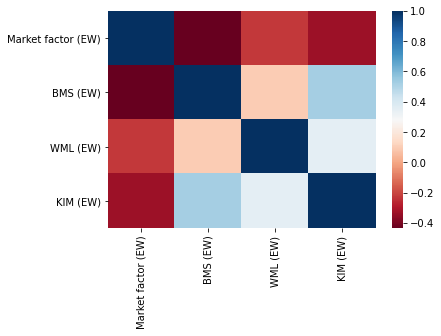

In [37]:
# CORRELATION (EW) - Upbit
#df_pre.head()
#column_names = {"Market factor (EW)": "Market factor", "BMS (EW)": "BMS", "WML (EW)": "WML", "ILLIQ (EW)": "ILLIQ"}
#df_pre = df_pre.rename(columns = column_names)
corr_EW = dg[['Market factor (EW)', 'BMS (EW)', 'WML (EW)', 'KIM (EW)']].corr(method = 'spearman')
display(corr_EW)
corr_EW.to_excel(r'C:\Users\danie\Documents\IMBA\SEMESTER 1\4. Research Methods & Data Analysis\3. Final report\Excel\From_Py\Corr_EW_Upbit.xlsx')
sns.heatmap(corr_EW, xticklabels = corr_EW.columns, yticklabels = corr_EW.columns, cmap = "RdBu")
plt.savefig(r'C:\Users\danie\Documents\IMBA\SEMESTER 1\4. Research Methods & Data Analysis\3. Final report\Excel\From_Py\Corr_EW_Upbit.png', bbox_inches='tight')

In [ ]:
# CORRELATION (VW) - Upbit
corr_VW = du[['Market factor (VW)', 'BMS (VW)', 'WML (VW)', 'KIM (VW)']].corr(method = 'spearman')
display(corr_VW)
corr_VW.to_excel(r'C:\Users\danie\Documents\IMBA\SEMESTER 1\4. Research Methods & Data Analysis\3. Final report\Excel\From_Py\Corr_VW_Upbit.xlsx')
sns.heatmap(corr_VW, xticklabels = corr_VW.columns, yticklabels = corr_VW.columns, cmap = "RdBu")
plt.savefig(r'C:\Users\danie\Documents\IMBA\SEMESTER 1\4. Research Methods & Data Analysis\3. Final report\Excel\From_Py\Corr_VW_Upbit.png', bbox_inches='tight')

In [ ]:
### Maybe no need
df_before = df
#df_after = df.drop(['MP', 'ret_MP', 'Rf'], axis = 1)

X1 = sm.tools.add_constant(df_before)
X2 = sm.tools.add_constant(df_after)

# Create a series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i ) for i in range (X1.shape[1])], index = X1.columns)
#series_after = pd.Series([variance_inflation_factor(X2.values, i ) for i in range (X2.shape[1])], index = X2.columns)

# Display the series
print('DATA BEFORE')
print("-" * 100)
display(series_before)

print('DATA AFTER')
print("-" * 100)
display(series_after)

In [ ]:
###Maybe no need
# Define a scatter plot
pd.plotting.scatter_matrix(df_after, alpha = 1, figsize = (30, 20))
plt.show()

In [40]:
# PART 3 - Kraken
# Get the summary
desc_df = df.describe() #back to the original dataset right now
desc_df = desc_df.drop(['r_f', 'Market factor (EW)', 'Market factor (VW)', 'BMS (EW)', 'BMS (VW)', 'WML (EW)', 'WML (VW)', 'KIM (EW)', 'KIM (VW)'], axis = 1)
# Add skewness, kurtosis and standard deviation metric
desc_df.loc['Skewness'] = desc_df.skew()
desc_df.loc['Kurtosis'] = desc_df.kurt()

desc_df = desc_df.round(4)
desc_df.to_excel(r'C:\Users\danie\Documents\IMBA\SEMESTER 1\4. Research Methods & Data Analysis\3. Final report\Excel\From_Py\DS_Kraken.xlsx')
desc_df

,Mp(EW),EMA_Mp(EW),Mp(VW),EMA_Mp(VW),Size_1(EW),Size_1(VW),Size_2(EW),Size_2(VW),Size_3(EW),Size_3(VW),...,Mom_2(EW),Mom_2(VW),Mom_3(EW),Mom_3(VW),Kim_1(EW),Kim_1(VW),Kim_2(EW),Kim_2(VW),Kim_3(EW),Kim_3(VW)
count,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,...,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000
mean,0.1720,0.0132,0.2317,0.0172,0.2674,0.2310,0.1347,0.1327,0.0868,-0.1243,...,0.1652,0.1427,0.1204,0.1172,0.1193,0.2414,0.1335,-0.1299,0.2627,0.4204
std,4.3319,0.0162,3.4917,0.0191,3.8299,3.4939,4.6629,5.0338,5.4678,4.5976,...,5.4170,5.1501,4.5865,4.9276,4.2425,3.4910,5.1889,4.6349,4.3697,4.2419
min,-17.5361,0.0000,-11.5222,0.0000,-12.4963,-11.5697,-20.6596,-20.7639,-20.5679,-21.9796,...,-19.3716,-20.8222,-17.0273,-12.4299,-18.6344,-11.6384,-16.4453,-22.4413,-17.8096,-13.5028
25%,-2.1304,0.0029,-1.9872,0.0018,-1.9843,-1.9807,-2.6466,-2.4029,-2.6337,-1.8669,...,-2.5263,-2.6249,-2.4704,-3.1034,-1.9701,-1.8330,-2.3349,-2.0205,-2.1095,-1.7832
50%,0.7069,0.0067,0.2688,0.0080,0.4567,0.2679,0.6930,0.6645,0.8055,-0.0079,...,0.8855,0.5518,0.2670,0.1465,0.4221,0.2957,0.7779,0.0509,0.8744,0.4784
75%,2.7714,0.0178,2.4296,0.0295,2.7573,2.4447,2.6901,2.9604,3.2907,2.2340,...,3.2058,3.0437,2.4525,2.4249,2.7696,2.5681,3.0635,2.1323,2.6989,3.1810
max,10.9688,0.0959,9.4901,0.0728,10.6074,9.4835,12.3004,14.9617,13.2486,14.8725,...,13.6321,15.5580,12.8579,15.5752,9.3166,9.5053,12.4850,14.6757,13.0309,11.1231
Skewness,2.7249,2.8284,2.7735,2.8284,2.7624,2.7733,2.6909,2.6734,2.6833,2.6656,...,2.6922,2.6687,2.7193,2.7339,2.7241,2.7728,2.7233,2.6624,2.7122,2.7528
Kurtosis,8.5552,8.9930,8.7549,8.9930,8.7078,8.7539,8.4170,8.3402,8.3857,8.3088,...,8.4188,8.3184,8.5257,8.5742,8.5548,8.7523,8.5452,8.2970,8.4992,8.6684


In [41]:
# PART 3 - Upbit
# Get the summary
desc_dg = dg.describe() #back to the original dataset right now
desc_dg = desc_dg.drop(['r_f', 'Market factor (EW)', 'Market factor (VW)', 'BMS (EW)', 'BMS (VW)', 'WML (EW)', 'WML (VW)', 'KIM (EW)', 'KIM (VW)'], axis = 1)
# Add skewness, kurtosis and standard deviation metric
desc_dg.loc['Skewness'] = desc_dg.skew()
desc_dg.loc['Kurtosis'] = desc_dg.kurt()

desc_dg = desc_dg.round(4)
desc_dg.to_excel(r'C:\Users\danie\Documents\IMBA\SEMESTER 1\4. Research Methods & Data Analysis\3. Final report\Excel\From_Py\DS_Upbit.xlsx')
desc_dg

,Mp(EW),EMA_Mp(EW),Mp(VW),EMA_Mp(VW),Size_1(EW),Size_1(VW),Size_2(EW),Size_2(VW),Size_3(EW),Size_3(VW),...,Mom_2(EW),Mom_2(VW),Mom_3(EW),Mom_3(VW),Kim_1(EW),Kim_1(VW),Kim_2(EW),Kim_2(VW),Kim_3(EW),Kim_3(VW)
count,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,...,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000,170.0000
mean,0.1876,0.0126,0.2474,0.0159,0.2828,0.2467,0.1497,0.1458,0.1032,-0.1035,...,-0.0217,-0.1099,0.1020,0.1465,0.1335,0.2569,0.1509,-0.1094,0.2778,0.4342
std,3.7138,0.0160,2.9502,0.0179,3.1986,2.9516,4.0301,4.4706,4.9900,3.9989,...,4.0219,4.0140,3.9420,4.4796,3.6128,2.9332,4.7362,4.0322,3.6878,3.5404
min,-12.7728,0.0000,-9.3289,0.0000,-8.0142,-9.3545,-16.0051,-16.4298,-17.8587,-16.0392,...,-15.5598,-16.2548,-12.1604,-16.5407,-14.0586,-8.9621,-16.7792,-16.5093,-13.1202,-9.1689
25%,-1.6259,0.0031,-1.3553,0.0017,-1.2781,-1.3497,-1.8693,-1.6902,-2.1388,-1.8092,...,-1.8935,-1.8221,-2.1010,-1.6913,-1.3027,-1.2248,-2.0847,-1.8533,-1.6702,-1.4535
50%,0.5410,0.0065,0.1940,0.0075,0.4489,0.1955,0.4300,0.3356,0.4436,-0.0376,...,0.1372,-0.0319,0.3329,0.3380,0.3965,0.2023,0.2859,-0.0259,0.5104,0.4624
75%,2.2813,0.0166,1.8965,0.0264,2.1707,1.8999,1.9224,2.3096,2.8369,1.9227,...,1.8760,1.9314,1.8440,2.2968,2.1951,1.9672,2.5527,1.9789,2.1402,2.4180
max,9.9262,0.0971,8.6172,0.0693,9.5869,8.6071,11.7094,14.4030,14.7556,13.5893,...,12.2812,13.2620,10.4251,14.5321,7.8221,8.6366,13.4625,13.3897,12.4096,10.8575
Skewness,2.7647,2.8284,2.7893,2.8284,2.7909,2.7892,2.7350,2.7161,2.7007,2.7251,...,2.7355,2.7253,2.7658,2.7145,2.7654,2.7909,2.7177,2.7226,2.7513,2.7801
Kurtosis,8.7183,8.9930,8.8227,8.9930,8.8296,8.8224,8.5924,8.5093,8.4467,8.5461,...,8.5921,8.5479,8.7210,8.5024,8.7235,8.8297,8.5185,8.5367,8.6579,8.7820
